# BASEBALL CASE STUDY

# Data Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

# Importing required libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import power_transform
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [107]:
import pandas as pd
df=pd.read_csv('baseball.csv')
pd.set_option('display.max_rows',None)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


W=Wins R-runs AB=At bat H=hits 2B=Doubles 3B=Tribles HR=homeruns BB= SO=Strikeouts SB=Stolen Buses RA=Runs allowed ER=Earned Runs ERA=Earned Runs Average CG= SHO=Shout outs SV=saves E=Errors

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [109]:
df.shape #checking the data dimension

(30, 17)

We have 30 rows and 17 columns including the target column.

In [110]:
df .dtypes #checking datatypes of dataset

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [111]:
#Checking the null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

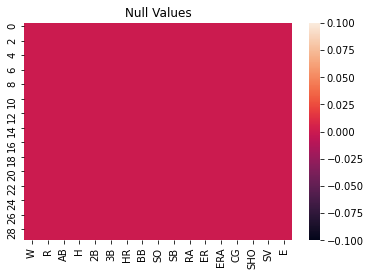

In [112]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the dataset.

# Graphical Representation

Text(0.5, 1.0, 'Winning Prediction')

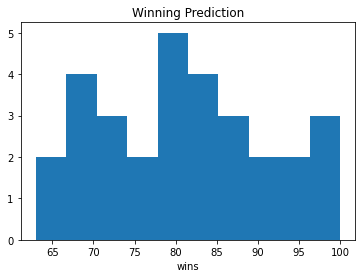

In [113]:
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('Winning Prediction')

<AxesSubplot:xlabel='W', ylabel='Density'>

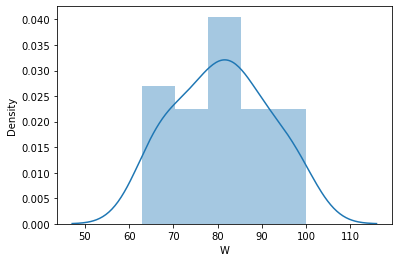

In [114]:
sns.distplot(df['W'],kde=True)

since the data in dataset is normal distributed,An distribution plot is used to check the skewness were at 900(x axis=R) v can see the difference

<AxesSubplot:xlabel='R', ylabel='Density'>

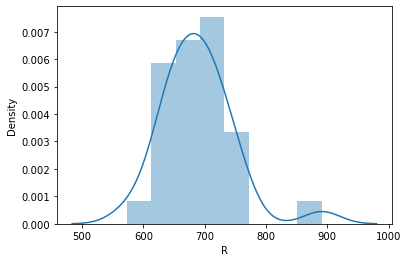

In [115]:
sns.distplot(df['R'])

Just by Observing above graph, the winning distribution of base ball is lies between 65 to 95.

In [116]:
collist=df.columns.values
ncol=12
nrow=10

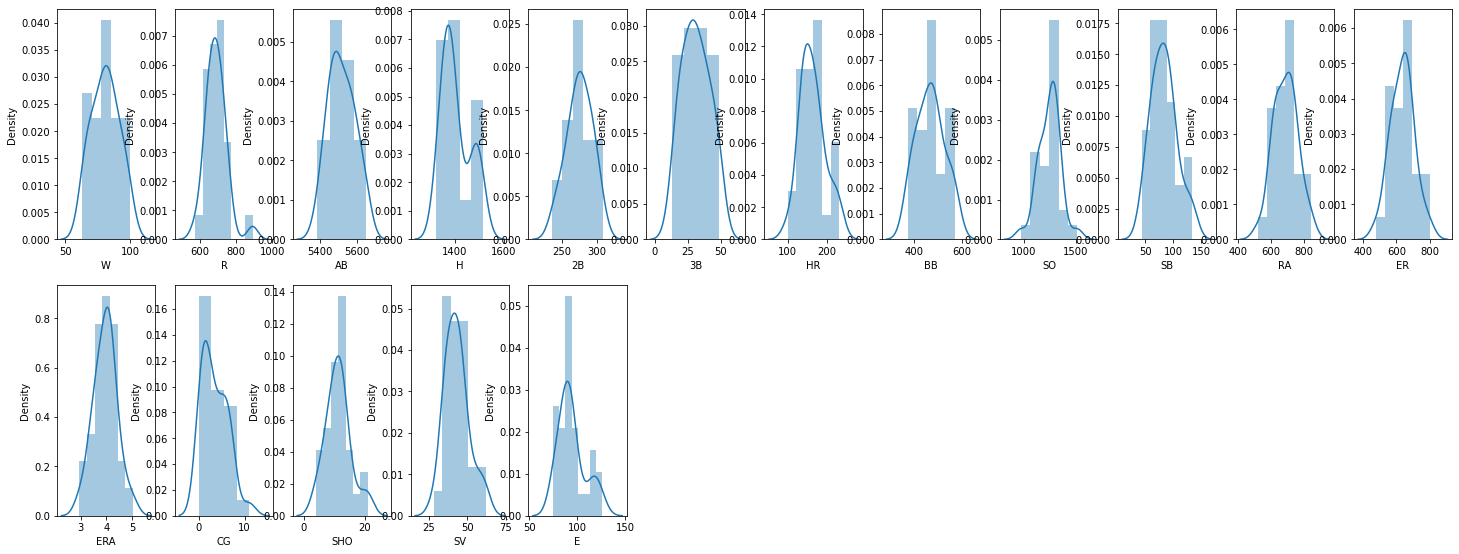

In [117]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(25,50))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

since all data in the dataset is normal distributed, An distplot is used for all columns in the dataset to check the difference in the graph

In [118]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


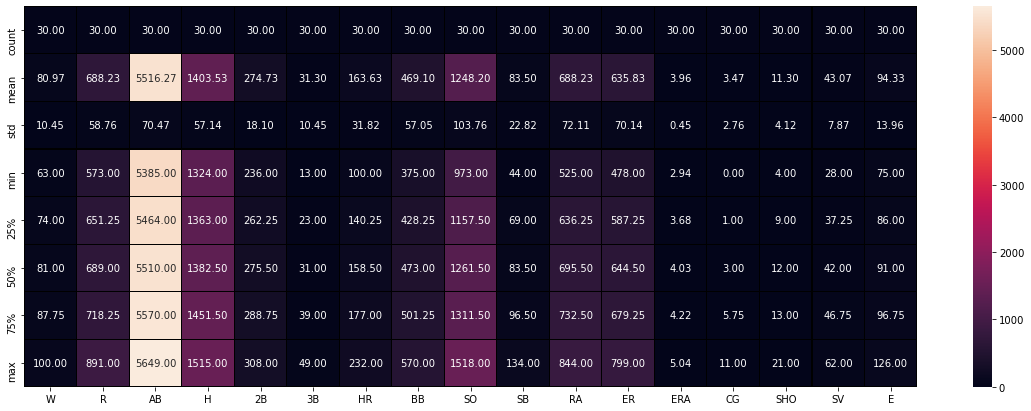

In [119]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

# Correlation of the columns with the Target columns:

In [120]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


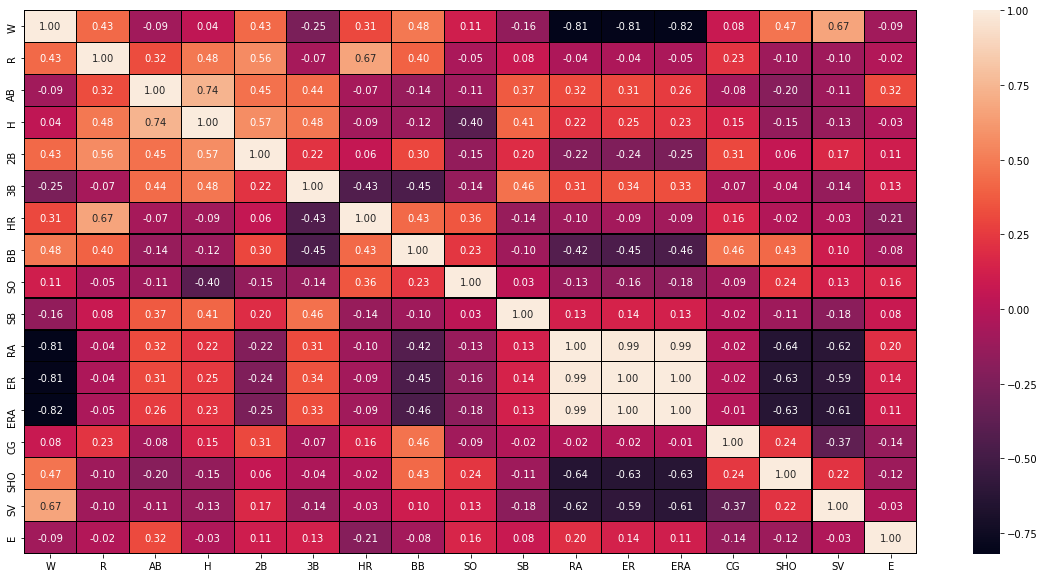

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

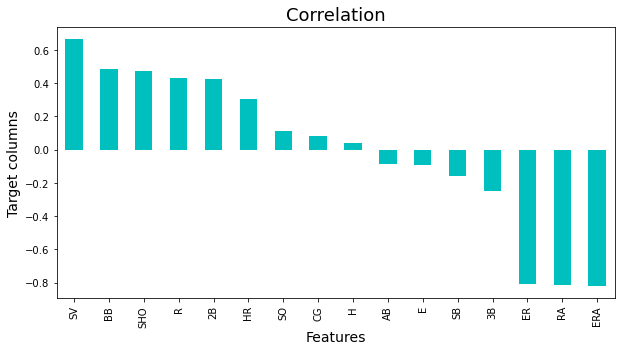

In [122]:
plt.figure(figsize=(10,5))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target columns',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


In [123]:
df.skew() #checking the skewness of thw dataset

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Checking Outliers:

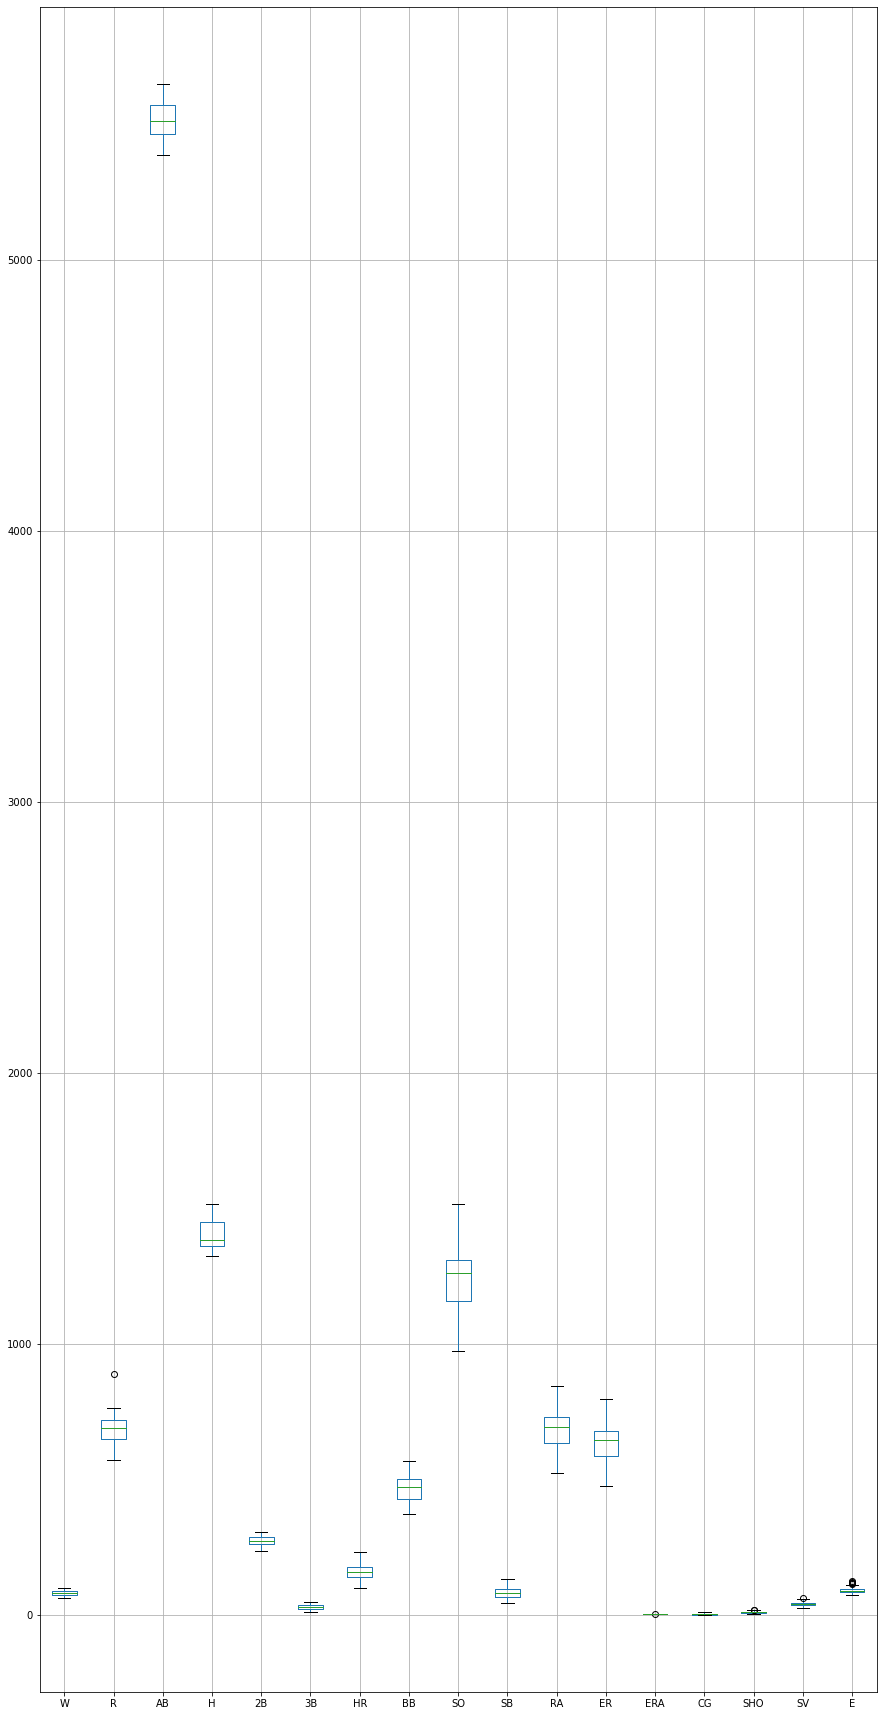

In [124]:
df.boxplot(figsize=[15,30])
plt.subplots_adjust(bottom=0.1)
plt.show()

In [125]:
collist=df.columns.values
ncol=12
nrows=10

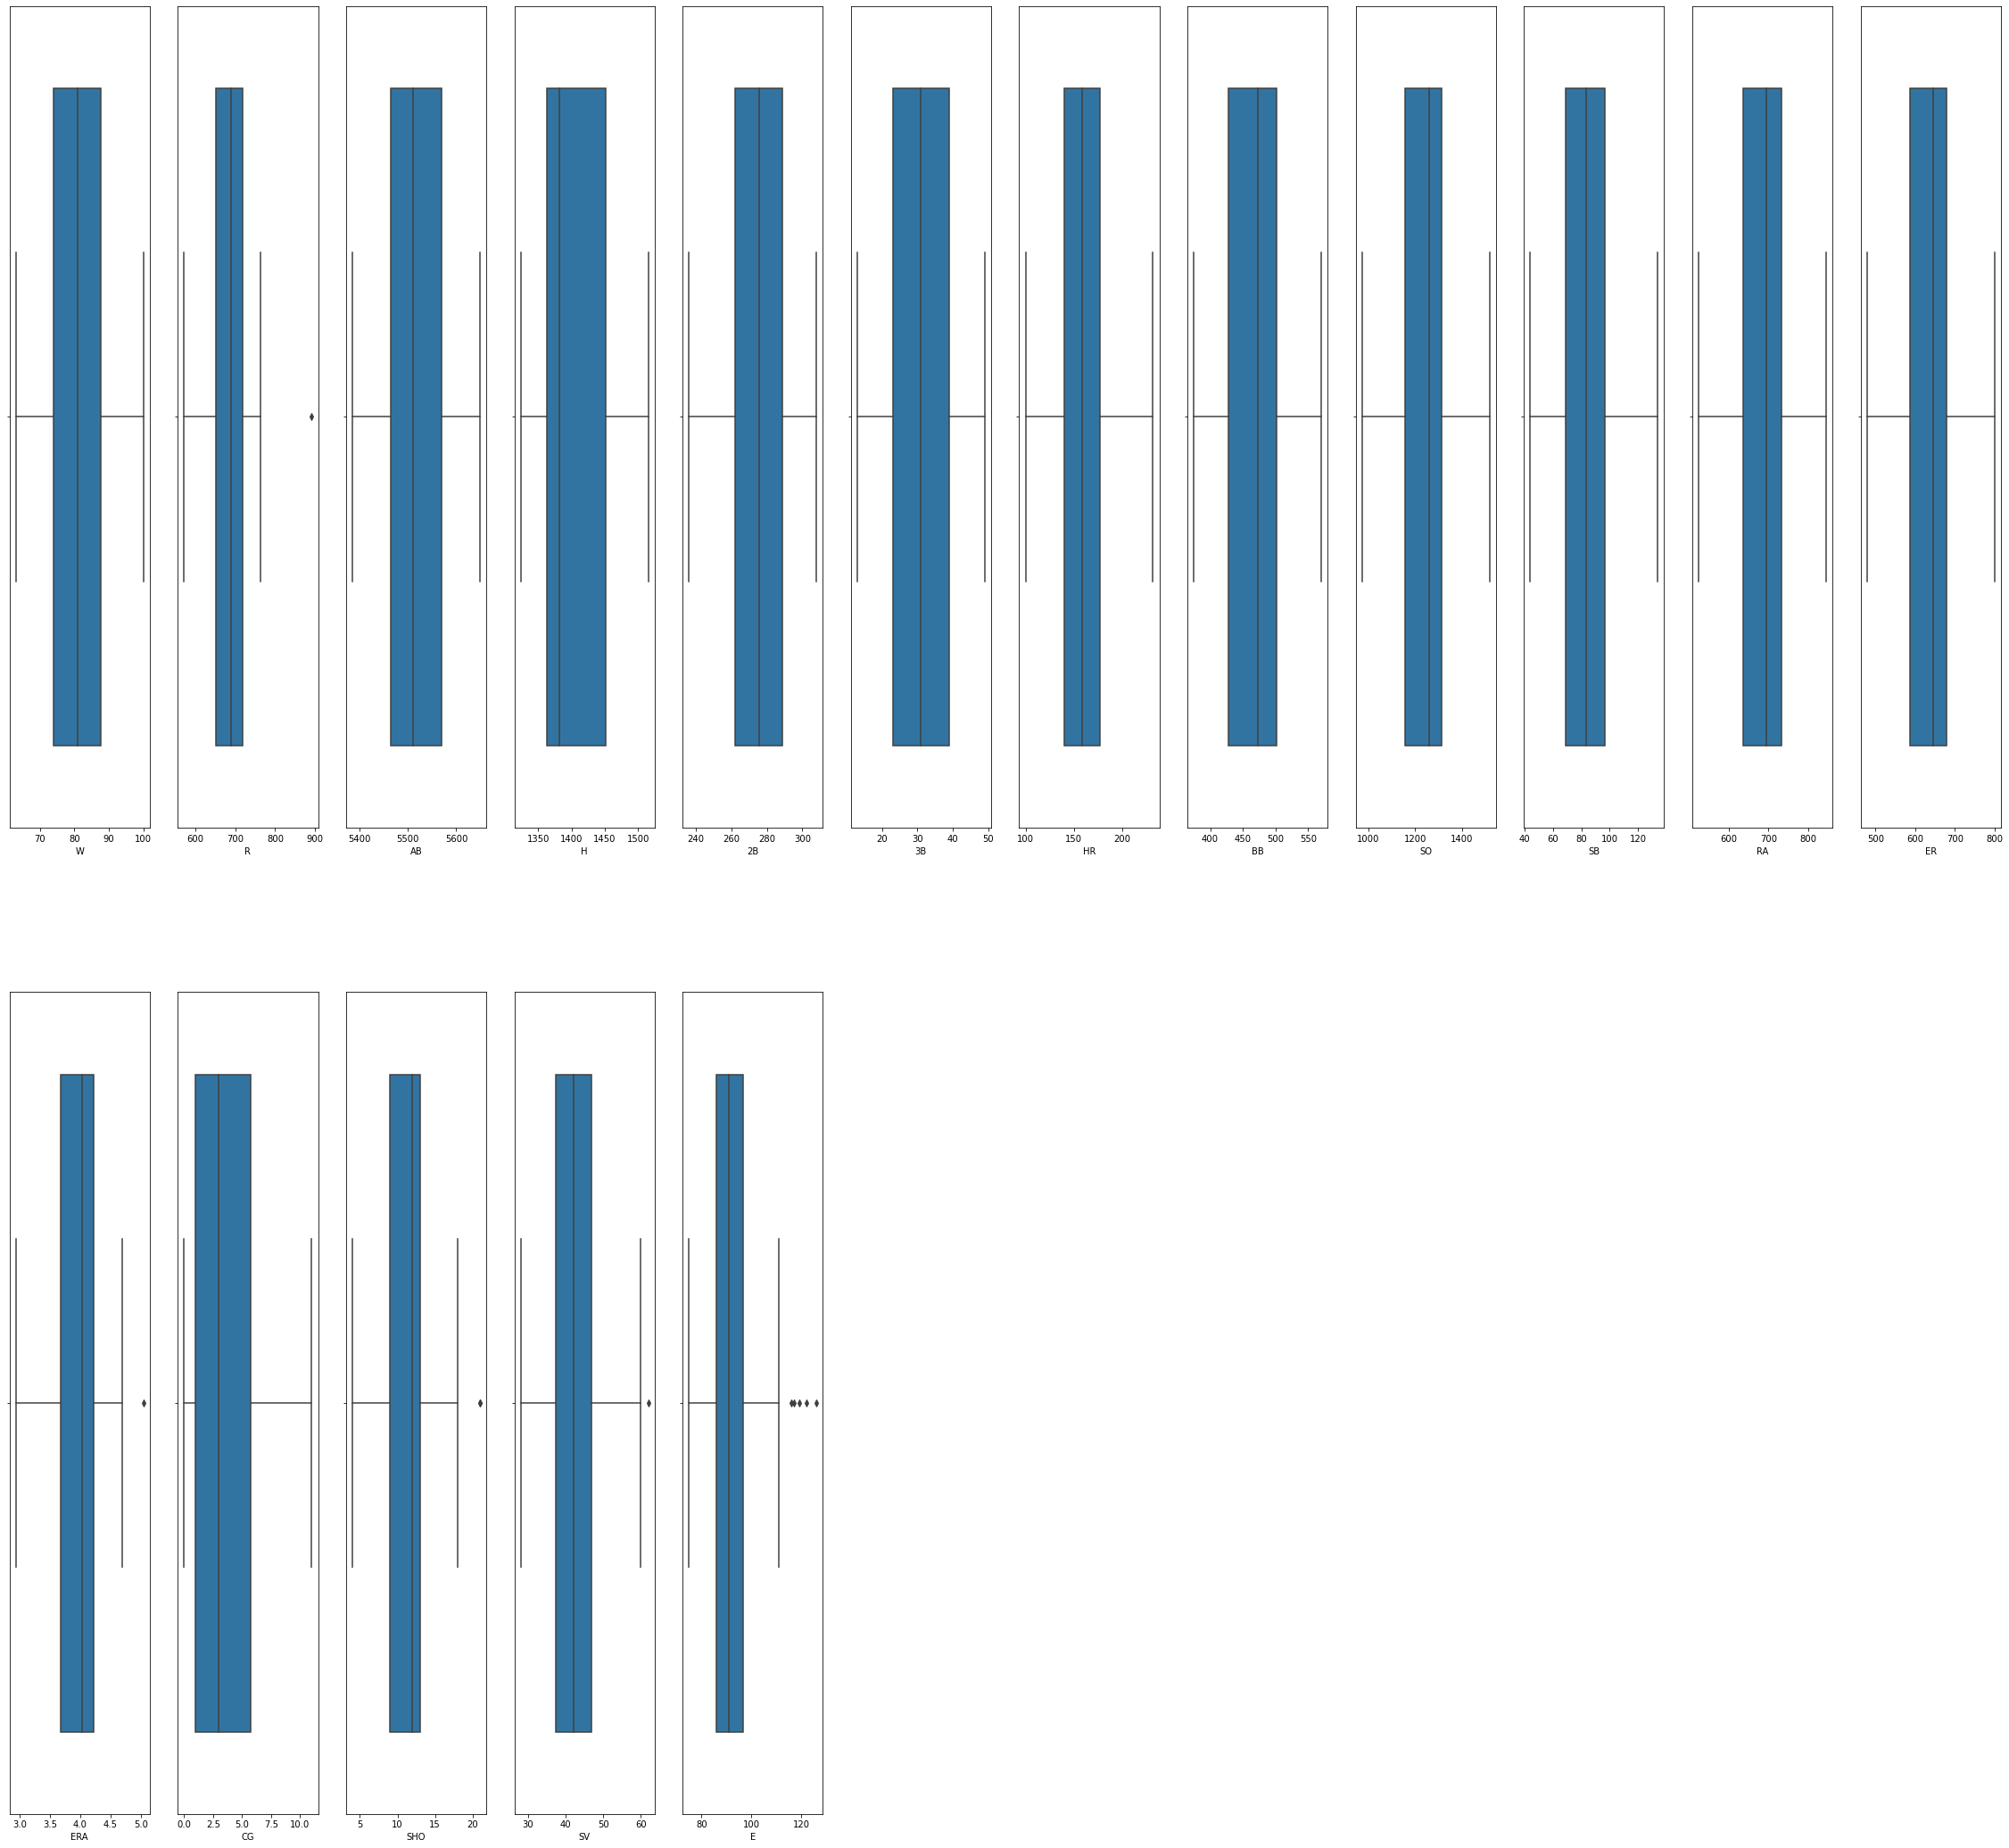

In [126]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(40,200))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]])

<AxesSubplot:>

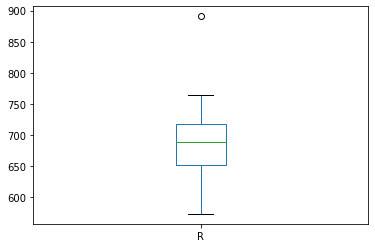

In [127]:
df["R"].plot.box()

<AxesSubplot:>

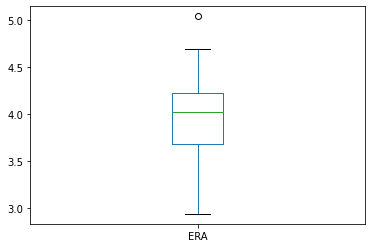

In [128]:
df["ERA"].plot.box()

<AxesSubplot:>

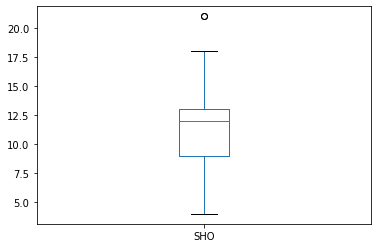

In [129]:
df["SHO"].plot.box()

<AxesSubplot:>

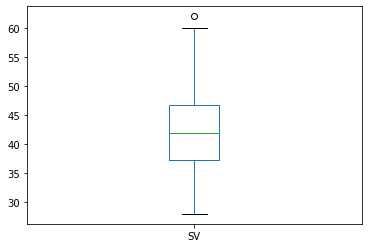

In [130]:
df["SV"].plot.box()

<AxesSubplot:>

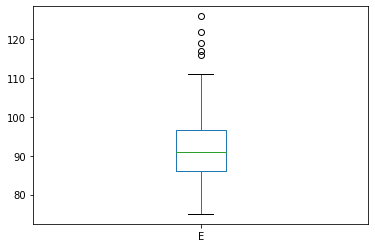

In [131]:
df["E"].plot.box()

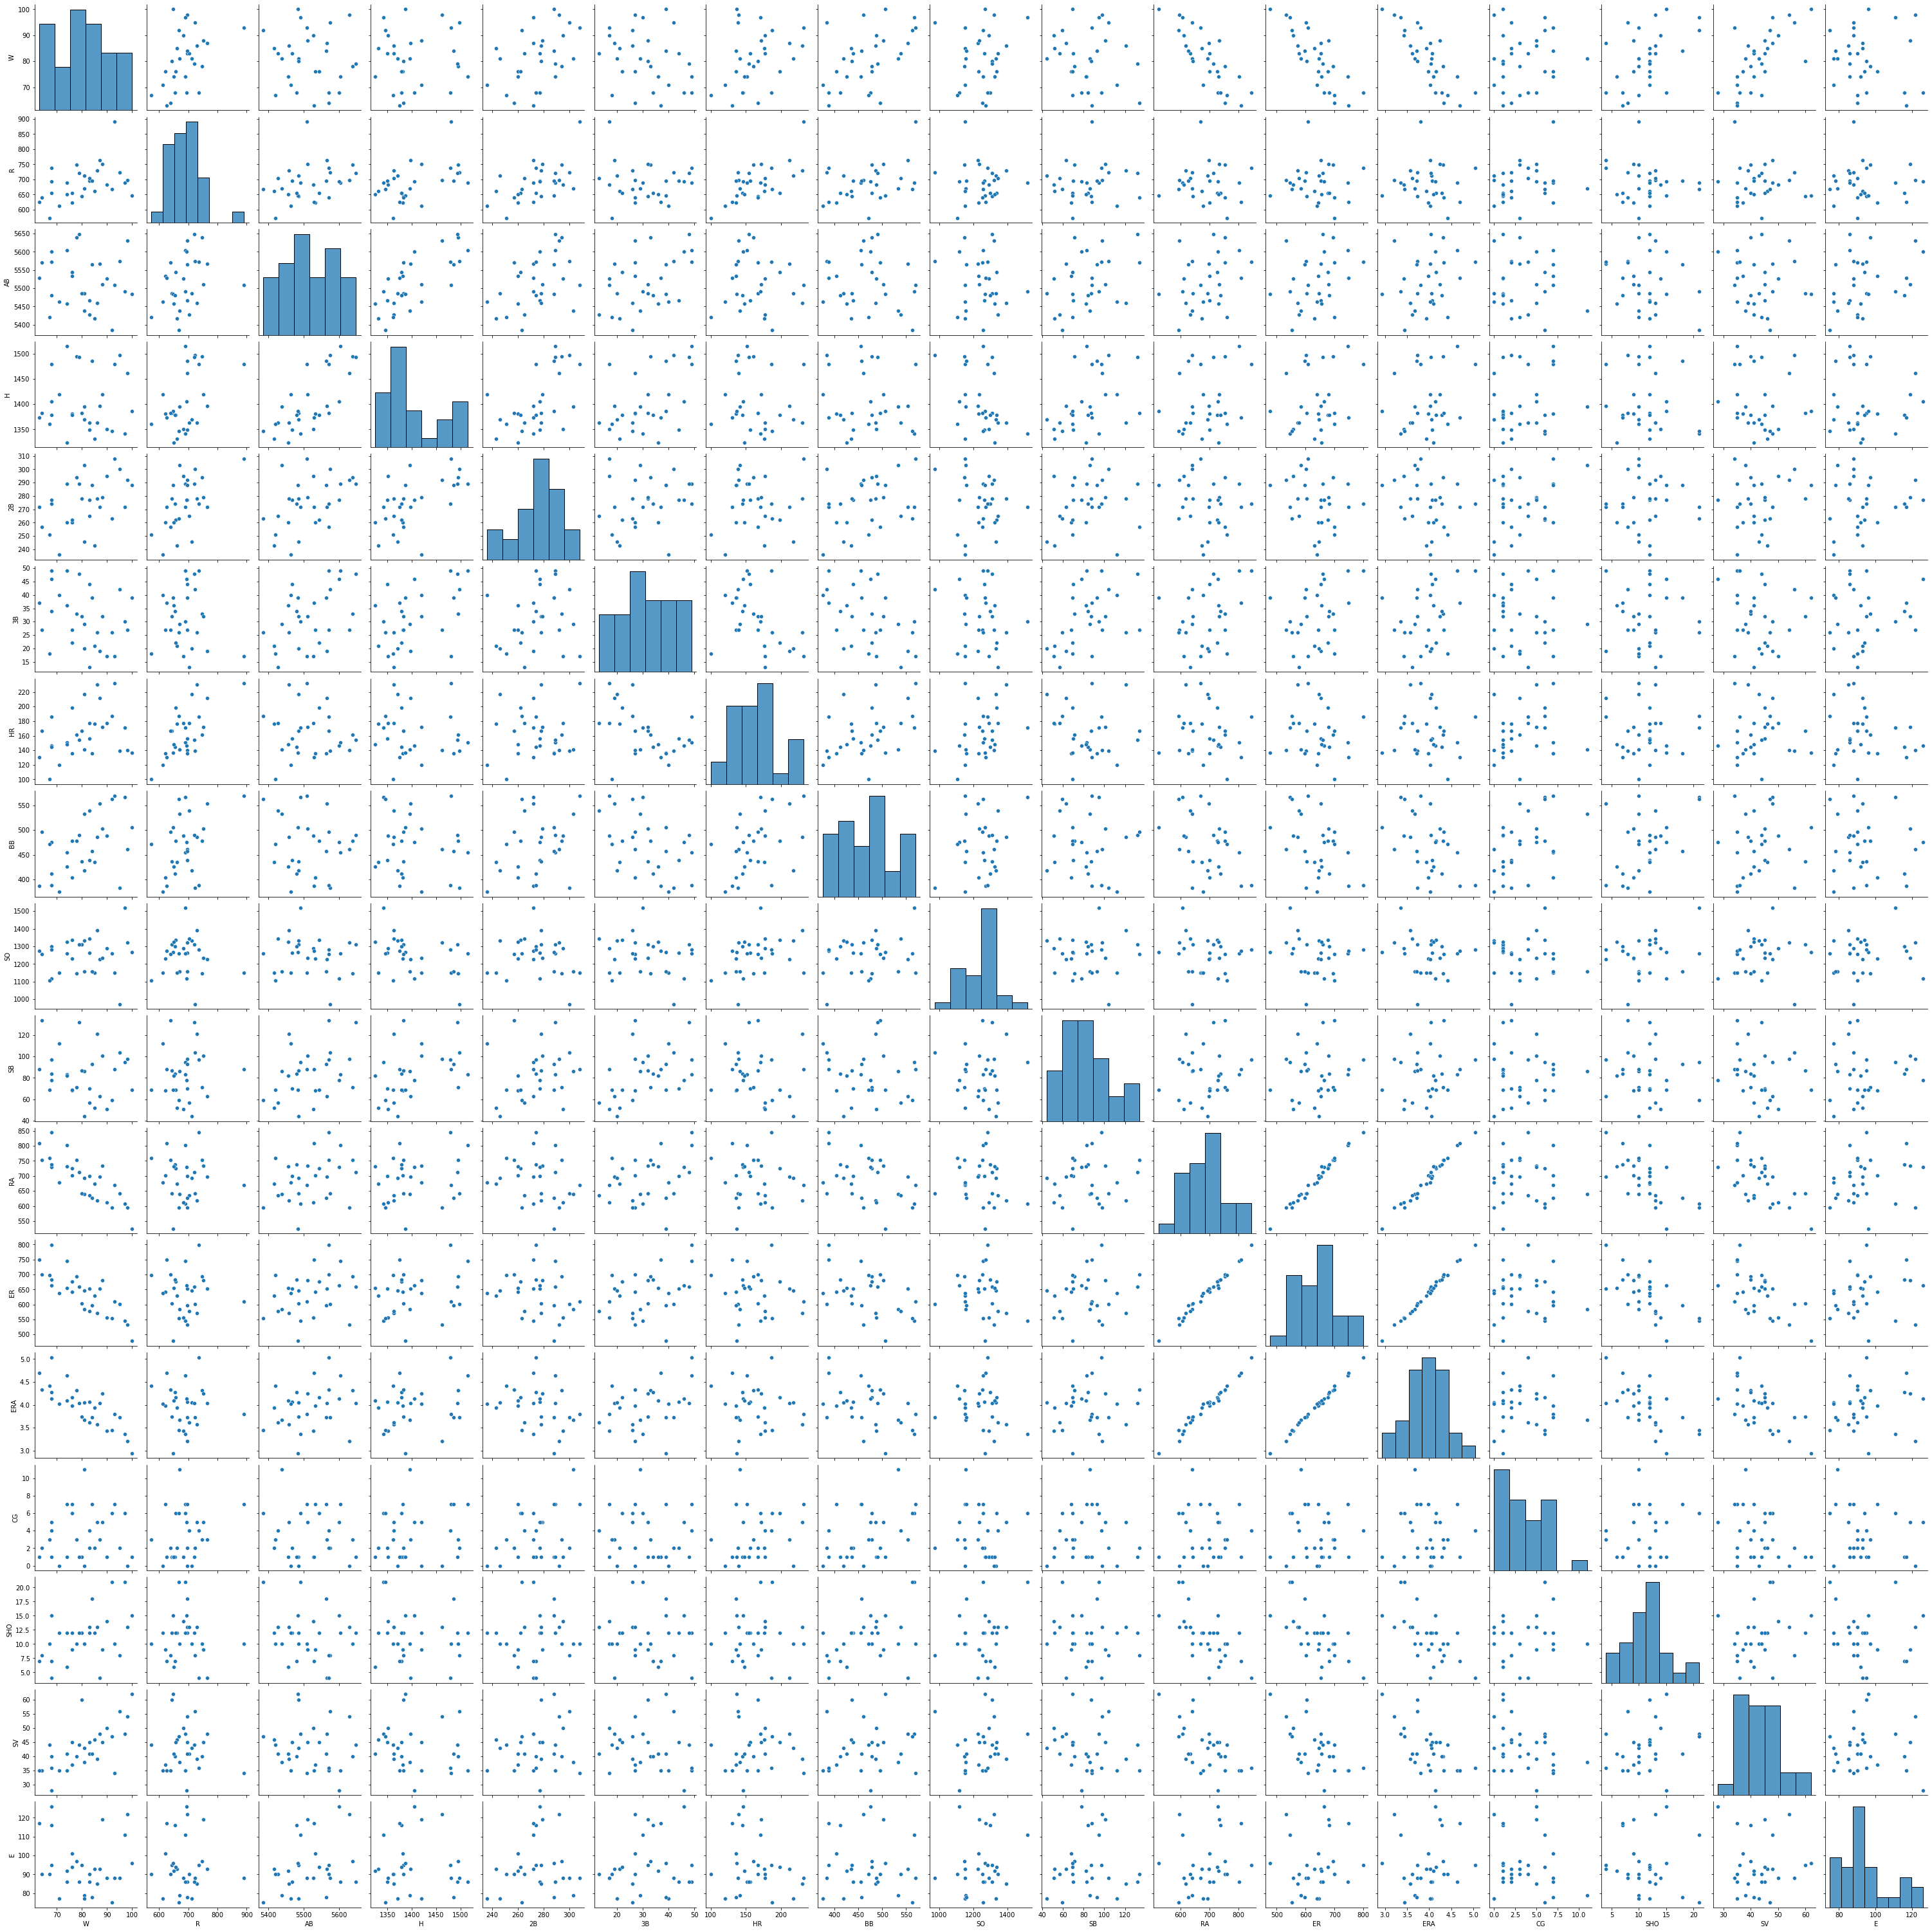

In [132]:
sns.pairplot(df)

# Considering the outlier removal

In [133]:
df.shape

(30, 17)

In [134]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [135]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [136]:
df_new=df[(z<3).all(axis=1)]

In [137]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [138]:
df_new.shape

(29, 17)

In [139]:
#percentage loss of data:

In [140]:
Data_loss=((30-29)/30)*100

In [141]:
Data_loss

3.3333333333333335

Outlier is Removed

# Removing Skewness from Dataset:

In [142]:
x= df.drop('W',axis=1)
y= df['W']

In [143]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [144]:
df_new.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

# Decision Tree Regressor Model

In [145]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [146]:
for i in range(0,300):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr.fit(x1_train,y1_train)
    pred_train=dtr.predict(x1_train)
    pred_test=dtr.predict(x1_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y1_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y1_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:-0.006706877925819255


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.1538325445619


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:-0.14338036478049276


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:-0.4089715139712877


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:-0.2678604436229206


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:-0.13608713154716656


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:-0.8653251521886176


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:-1.1658644946316183


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:-0.6152523874488407


A

At random state 110,the training accuracy is:1.0
At random state 110,the testing accuracy is:-0.4700465941868206


At random state 111,the training accuracy is:1.0
At random state 111,the testing accuracy is:-0.2956458882558044


At random state 112,the training accuracy is:1.0
At random state 112,the testing accuracy is:-0.4232873453853474


At random state 113,the training accuracy is:1.0
At random state 113,the testing accuracy is:-0.2104664391353812


At random state 114,the training accuracy is:1.0
At random state 114,the testing accuracy is:-0.23669309173272923


At random state 115,the training accuracy is:1.0
At random state 115,the testing accuracy is:0.20750708215297453


At random state 116,the training accuracy is:1.0
At random state 116,the testing accuracy is:-0.008052871265133765


At random state 117,the training accuracy is:1.0
At random state 117,the testing accuracy is:-0.2256235827664399


At random state 118,the training accuracy is:1.0
At random state 118,the test

At random state 183,the training accuracy is:1.0
At random state 183,the testing accuracy is:0.2344569288389513


At random state 184,the training accuracy is:1.0
At random state 184,the testing accuracy is:-0.3236550970989034


At random state 185,the training accuracy is:1.0
At random state 185,the testing accuracy is:0.002741732942653674


At random state 186,the training accuracy is:1.0
At random state 186,the testing accuracy is:0.1872037914691943


At random state 187,the training accuracy is:1.0
At random state 187,the testing accuracy is:-1.8920345489443378


At random state 188,the training accuracy is:1.0
At random state 188,the testing accuracy is:-1.053681930693069


At random state 189,the training accuracy is:1.0
At random state 189,the testing accuracy is:0.18730195712954334


At random state 190,the training accuracy is:1.0
At random state 190,the testing accuracy is:0.304762317458942


At random state 191,the training accuracy is:1.0
At random state 191,the testing acc

At random state 267,the training accuracy is:1.0
At random state 267,the testing accuracy is:-1.1958927277120077


At random state 268,the training accuracy is:1.0
At random state 268,the testing accuracy is:-1.1395747765160666


At random state 269,the training accuracy is:1.0
At random state 269,the testing accuracy is:0.2211366860385301


At random state 270,the training accuracy is:1.0
At random state 270,the testing accuracy is:-0.21493212669683248


At random state 271,the training accuracy is:1.0
At random state 271,the testing accuracy is:-0.5192872450194459


At random state 272,the training accuracy is:1.0
At random state 272,the testing accuracy is:-0.011227544910179521


At random state 273,the training accuracy is:1.0
At random state 273,the testing accuracy is:0.27746947835738067


At random state 274,the training accuracy is:1.0
At random state 274,the testing accuracy is:0.03390049536937334


At random state 275,the training accuracy is:1.0
At random state 275,the testi

In [147]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=189)
dtr.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [148]:
# predict the value
pred=dtr.predict(x1_test)
print("predicted ",pred)
print("actual ",y1_test)

predicted  [ 88.  79.  64.  88.  64. 100.  83.  83.  76.  67.  64.  88.  88.  88.
  76.  67.  88.  76.  88.  95.  76.]
actual  25    92
22    71
29    68
17    97
24    63
20    90
11    86
5     93
14    68
9     78
4     74
12    85
13    76
6     87
26    84
18    68
1     83
2     81
8     80
16    98
28    74
Name: W, dtype: int64


In [149]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y1_test,pred))
print("Mean squared error:",mean_squared_error(y1_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred)))

error:
Mean absolute error: 6.0
Mean squared error: 48.476190476190474
Root mean squared error: 6.9624845045565795


In Decision Tree Classifier model, The Root mean squared error value is high so we should compare with more model.

In [150]:
predict_test=dtr.predict(x1_test)
print(r2_score(y1_test,predict_test)*100)

50.1910531220876


In [151]:
predict_train=dtr.predict(x1_train)
print(r2_score(y1_train,predict_train)*100)

100.0


In [152]:
Train_accuracy=r2_score(y1_train,predict_train)
Test_accuracy=r2_score(y1_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -1.53916207158586 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -0.18704299719883835 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -0.397805334989835 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -2.0814317118546226 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -0.8639658490930229 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -0.8709509282141301 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv score is -2.296570350003069 and accuracy score for training is 1.0 and accuracy score  for the 0.501910531220876


At cross fold(j) the cv

Lets plot with y_test vs prediction

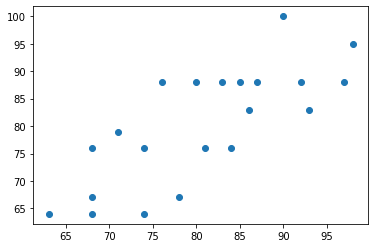

In [153]:
plt.scatter(x=y1_test,y=predict_test)

# Random Forest Regressor Model

In [154]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [155]:
for i in range(0,300):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr.fit(x2_train,y2_train)
    pred_train=rdr.predict(x2_train)
    pred_test=rdr.predict(x2_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y2_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y2_test,pred_test)}')

At random state 0,the training accuracy is:0.8972725245212518
At random state 0,the testing accuracy is:0.5165565763413755
At random state 1,the training accuracy is:0.8537810344827587
At random state 1,the testing accuracy is:0.2802171281348136
At random state 2,the training accuracy is:0.9187227871939735
At random state 2,the testing accuracy is:0.21831823165036113
At random state 3,the training accuracy is:0.906200718421617
At random state 3,the testing accuracy is:0.5516453874371632
At random state 4,the training accuracy is:0.9298826200993926
At random state 4,the testing accuracy is:0.07515417744916797
At random state 5,the training accuracy is:0.8988227360308286
At random state 5,the testing accuracy is:0.39153779800509914
At random state 6,the training accuracy is:0.8993285714285714
At random state 6,the testing accuracy is:0.22282163494057394
At random state 7,the training accuracy is:0.898868782161235
At random state 7,the testing accuracy is:0.05652926693817106
At random sta

At random state 68,the training accuracy is:0.895710964827984
At random state 68,the testing accuracy is:0.5466257202659444
At random state 69,the training accuracy is:0.9492674476439791
At random state 69,the testing accuracy is:0.37381613045672457
At random state 70,the training accuracy is:0.95226677852349
At random state 70,the testing accuracy is:-0.2640388326069034
At random state 71,the training accuracy is:0.949412694475761
At random state 71,the testing accuracy is:0.41591855289201674
At random state 72,the training accuracy is:0.8676296913244492
At random state 72,the testing accuracy is:0.5412193108670962
At random state 73,the training accuracy is:0.8541328430061513
At random state 73,the testing accuracy is:0.33558524166769155
At random state 74,the training accuracy is:0.906044660194175
At random state 74,the testing accuracy is:0.215155970037733
At random state 75,the training accuracy is:0.9174747213114756
At random state 75,the testing accuracy is:0.472025114416476
At 

At random state 135,the training accuracy is:0.8893701634275618
At random state 135,the testing accuracy is:0.1841569387658074
At random state 136,the training accuracy is:0.9189523707865169
At random state 136,the testing accuracy is:0.16144348278734044
At random state 137,the training accuracy is:0.892766132450331
At random state 137,the testing accuracy is:0.5523249043564114
At random state 138,the training accuracy is:0.7557626251390432
At random state 138,the testing accuracy is:-0.2864496370309948
At random state 139,the training accuracy is:0.9103234062268347
At random state 139,the testing accuracy is:-0.15696642512077275
At random state 140,the training accuracy is:0.9269795936395759
At random state 140,the testing accuracy is:0.32665813914780273
At random state 141,the training accuracy is:0.9152318485861963
At random state 141,the testing accuracy is:0.26443082341823776
At random state 142,the training accuracy is:0.8524231406714831
At random state 142,the testing accuracy i

At random state 201,the training accuracy is:0.8863435302916978
At random state 201,the testing accuracy is:0.3798877474081056
At random state 202,the training accuracy is:0.9111677358490565
At random state 202,the testing accuracy is:0.12339551047170894
At random state 203,the training accuracy is:0.8685171296296296
At random state 203,the testing accuracy is:0.3465500536809817
At random state 204,the training accuracy is:0.8067290123456787
At random state 204,the testing accuracy is:0.3185873017870625
At random state 205,the training accuracy is:0.9277559445071786
At random state 205,the testing accuracy is:0.4731436684468424
At random state 206,the training accuracy is:0.9307
At random state 206,the testing accuracy is:0.030444377531443356
At random state 207,the training accuracy is:0.9457228225806451
At random state 207,the testing accuracy is:0.29265034954559044
At random state 208,the training accuracy is:0.8415436967632025
At random state 208,the testing accuracy is:0.466379148

At random state 268,the training accuracy is:0.8676541587901703
At random state 268,the testing accuracy is:0.3276053177095918
At random state 269,the training accuracy is:0.9014549734325186
At random state 269,the testing accuracy is:0.36434538507298775
At random state 270,the training accuracy is:0.8350448380566801
At random state 270,the testing accuracy is:0.40217999353587586
At random state 271,the training accuracy is:0.8991913090128756
At random state 271,the testing accuracy is:0.33904137629970643
At random state 272,the training accuracy is:0.8278211564171123
At random state 272,the testing accuracy is:0.16562667789421148
At random state 273,the training accuracy is:0.8887998437500001
At random state 273,the testing accuracy is:0.49822887952779726
At random state 274,the training accuracy is:0.9433298609098812
At random state 274,the testing accuracy is:0.24110337497307754
At random state 275,the training accuracy is:0.94034481292517
At random state 275,the testing accuracy is

In [156]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=72)
rdr.fit(x2_train,y2_train)

RandomForestRegressor()

In [157]:
# predict the value
pred=rdr.predict(x2_test)
print("predicted ",pred)
print("actual ",y2_test)

predicted  [77.04 85.51 83.45 75.56 88.54 70.08 76.52 70.74 85.86 83.71 86.51 81.76
 80.34 81.05 70.84 76.49 74.5  80.67 83.08 82.2  76.85]
actual  22    71
20    90
6     87
3     76
17    97
4     74
27    79
9     78
2     81
11    86
21    83
0     95
26    84
1     83
29    68
28    74
18    68
16    98
8     80
12    85
13    76
Name: W, dtype: int64


In [158]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y2_test,pred))
print("Mean squared error:",mean_squared_error(y2_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred)))

error:
Mean absolute error: 4.859047619047619
Mean squared error: 39.228895238095234
Root mean squared error: 6.263297473224087


In Random Forest Classifier model, The Root mean squared error value is love when compared with decison tree regression model.

In [159]:
predict_test=rdr.predict(x2_test)
print(r2_score(y2_test,predict_test)*100)

45.412271866717155


In [160]:
predict_train=rdr.predict(x2_train)
print(r2_score(y2_train,predict_train)*100)

88.9987911340767


In [161]:
Train_accuracy=r2_score(y2_train,predict_train)
Test_accuracy=r2_score(y2_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -0.3284712380720492 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is 0.426335652050144 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is 0.39564112195179413 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is -0.6898360854176085 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is 0.25052873614206295 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is 0.00773788763187241 and accuracy score for training is 0.8899879113407669 and accuracy score  for the 0.4541227186671716


At cross fold(j) the cv score is -0.2330126601323479 and accuracy 

Lets plot with y_test vs prediction

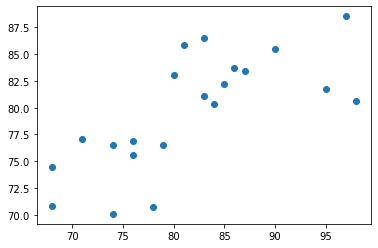

In [162]:
plt.scatter(x=y2_test,y=predict_test)

# Linear Regression Model

In [163]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [164]:
for i in range(0,300):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr.fit(x3_train,y3_train)
    pred_train=lr.predict(x3_train)
    pred_test=lr.predict(x3_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y3_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y3_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.03726461839265838


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.2898081205472569


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:-0.44468746162250006


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:-0.6401962420853777


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.03124778976424114


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.18328836379539426


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.18450962784000968


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.0681324311494631


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.5547753932666074


At 

At random state 81,the training accuracy is:1.0
At random state 81,the testing accuracy is:0.45213039287165346


At random state 82,the training accuracy is:1.0
At random state 82,the testing accuracy is:0.019888584891090577


At random state 83,the training accuracy is:1.0
At random state 83,the testing accuracy is:0.563221366882078


At random state 84,the training accuracy is:1.0
At random state 84,the testing accuracy is:-0.6996453453126543


At random state 85,the training accuracy is:1.0
At random state 85,the testing accuracy is:0.29613338122729194


At random state 86,the training accuracy is:1.0
At random state 86,the testing accuracy is:0.13281817575638255


At random state 87,the training accuracy is:1.0
At random state 87,the testing accuracy is:0.3602264126083231


At random state 88,the training accuracy is:1.0
At random state 88,the testing accuracy is:-3.3033047728715905


At random state 89,the training accuracy is:1.0
At random state 89,the testing accuracy is:0.54433

At random state 162,the training accuracy is:1.0
At random state 162,the testing accuracy is:0.24629300481564576


At random state 163,the training accuracy is:1.0
At random state 163,the testing accuracy is:-0.5397269917452308


At random state 164,the training accuracy is:1.0
At random state 164,the testing accuracy is:-1.305885904148126


At random state 165,the training accuracy is:1.0
At random state 165,the testing accuracy is:-0.4443562300269768


At random state 166,the training accuracy is:1.0
At random state 166,the testing accuracy is:0.5549818485974201


At random state 167,the training accuracy is:1.0
At random state 167,the testing accuracy is:-0.8480480995467303


At random state 168,the training accuracy is:1.0
At random state 168,the testing accuracy is:0.4524492861473114


At random state 169,the training accuracy is:1.0
At random state 169,the testing accuracy is:-0.619218529231041


At random state 170,the training accuracy is:1.0
At random state 170,the testing acc

At random state 234,the training accuracy is:1.0
At random state 234,the testing accuracy is:0.5909118544363761


At random state 235,the training accuracy is:1.0
At random state 235,the testing accuracy is:-0.42173417782668365


At random state 236,the training accuracy is:1.0
At random state 236,the testing accuracy is:0.5913138887020886


At random state 237,the training accuracy is:1.0
At random state 237,the testing accuracy is:0.35790498363504886


At random state 238,the training accuracy is:1.0
At random state 238,the testing accuracy is:-0.15839257304077048


At random state 239,the training accuracy is:1.0
At random state 239,the testing accuracy is:0.4984503403397438


At random state 240,the training accuracy is:1.0
At random state 240,the testing accuracy is:0.4936646651315403


At random state 241,the training accuracy is:1.0
At random state 241,the testing accuracy is:-0.1954131735817093


At random state 242,the training accuracy is:1.0
At random state 242,the testing a

In [165]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.1,random_state=248)
lr.fit(x3_train,y3_train)

LinearRegression()

In [166]:
# predict the value
pred=lr.predict(x3_test)
print("predicted ",pred)
print("actual ",y3_test)

predicted  [76.85560238 90.83522465 66.81471746]
actual  3     76
0     95
23    67
Name: W, dtype: int64


In [167]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y3_test,pred))
print("Mean squared error:",mean_squared_error(y3_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y3_test,pred)))

error:
Mean absolute error: 1.7352200924868602
Mean squared error: 6.03724626118306
Root mean squared error: 2.457080841401654


The Root mean squared error value is low so we can say this is an good model when compared with another model. finally while comparing with all 3 model linear regressor model is best in case.

In [168]:
predict_test=lr.predict(x3_test)
print(r2_score(y3_test,predict_test)*100)

95.5680900203387


In [169]:
predict_train=lr.predict(x3_train)
print(r2_score(y3_train,predict_train)*100)

94.44389356496691


In [170]:
Train_accuracy=r2_score(y3_train,predict_train)
Test_accuracy=r2_score(y3_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')


At cross fold(j) the cv score is -1.0579322058345588 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.22588460167740146 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.24952166654368443 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.040755406674648456 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.25153530937202156 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.3890804644290262 and accuracy score for training is 0.9444389356496691 and accuracy score  for the 0.955680900203387


At cross fold(j) the cv score is 0.3193702210966932 and accuracy score

Lets plot with y_test vs prediction

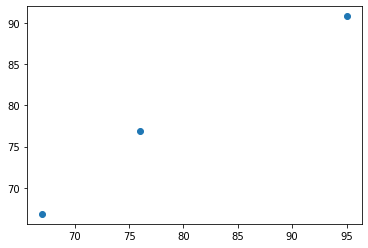

In [171]:
plt.scatter(x=y3_test,y=predict_test)

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [173]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
ls=r2_score(y_test,pred_decision)
print('R2 Score:',ls*100)

R2 Score: 85.14601955839692


Hyper Parameter Tuning for Decision Tree Regressor

In [174]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15)}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [175]:
GCV.best_params_

{'max_depth': 2}

In [176]:
dtr=DecisionTreeRegressor(max_depth=5,random_state=8)

dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)
pred_decision=dtr.predict(x1_test)
dtr=r2_score(y1_test,pred_decision)
print('R2 Score:',dtr*100)

R2 Score: -29.806616961789366


Hyper Parameter Tuning for Random Forest Regressor

In [177]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x2_train,y2_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [178]:
rdr=RandomForestRegressor(criterion='mse',max_features='auto')
rdr.fit(x2_train,y2_train)
rdr.score(x2_train,y2_train)
pred_decision=rdr.predict(x2_test)
rdr=r2_score(y2_test,pred_decision)
print('R2 Score:',rdr*100)

R2 Score: 40.88221033699355


<AxesSubplot:xlabel='W', ylabel='Density'>

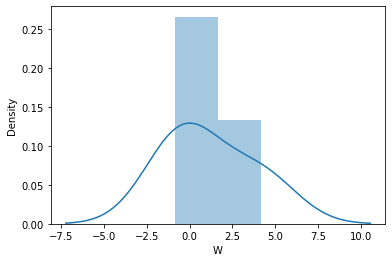

In [179]:
sns.distplot((y3_test-pred))

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
3,76,76.855602
0,95,90.835225
23,67,66.814717


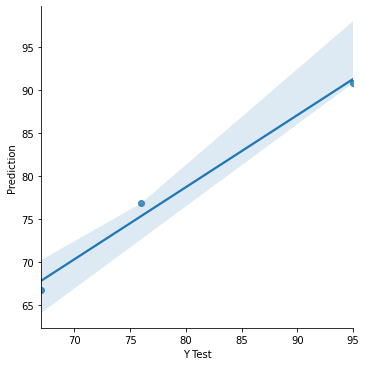

In [180]:
data=pd.DataFrame({'Y Test':y3_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [181]:
import joblib
joblib.dump('mod',"Baseball Case Study.pkl")

['Baseball Case Study.pkl']

# Loading the Saved Model

In [182]:
model=joblib.load("Baseball Case Study.pkl")
predict_test=lr.predict(x3_test)
print(r2_score(y3_test,predict_test)*100)

95.5680900203387


In [183]:
predict_test=pd.DataFrame(predict_test)  # Converting into Data Frame
predict_test.to_csv('Result of Baseball Case Study.csv')  
predict_test

,0
0,76.855602
1,90.835225
2,66.814717
